## Observations and Insights

#### 1. The Drug Regimens Ramicane and Capomulin were the only two therapies in the test on average to reduce the size of tumors over the course of the trial
#### 2. The heavier the mouse, the larger the tumor volume was on average. Removing other factors that could cause weight fluctuations the average Tumor added about .75g per mm3

## Dependencies and starter code

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
study_combined = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
study_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
study_summary = pd.DataFrame(columns=["Average Tumor Size", "Median Tumor Size", "Variance", "Standard Deviation"])
study_summary["Average Tumor Size"] = study_combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
study_summary["Median Tumor Size"] = study_combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
study_summary["Variance"] = study_combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
study_summary["Standard Deviation"] = study_combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
study_summary["SEM"] = study_combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
study_summary

,Average Tumor Size,Median Tumor Size,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

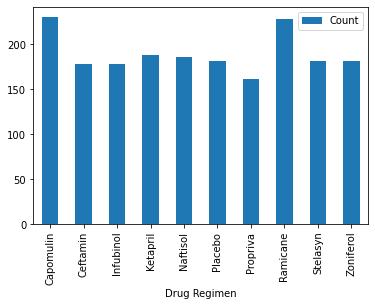

In [49]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
study_summary["Count"] = study_combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()
study_summary = study_summary.reset_index()
study_plot = study_summary.plot.bar("Drug Regimen", "Count")

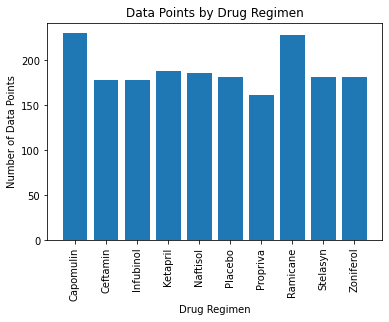

In [50]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
study_py_plt_x = study_summary["Drug Regimen"]
study_py_plt_y = study_summary["Count"]
study_py_plt = plt.bar(study_py_plt_x, study_py_plt_y)
plt.xticks(rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Data Points by Drug Regimen")
plt.show()

## Pie plots

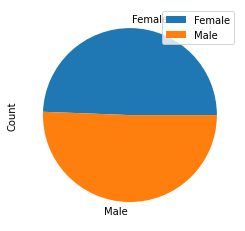

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
study_genders = pd.DataFrame(study_combined.groupby("Sex")["Age_months"].count())
study_genders = study_genders.rename(columns={"Age_months": "Count"})
study_genders_plt = study_genders.plot.pie(y="Count")
study_genders = study_genders.reset_index()

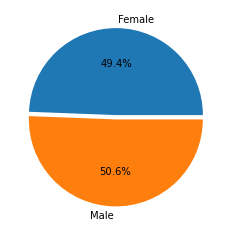

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = study_genders["Sex"].unique()
gender = study_genders["Count"]
explode = [0,0.05]
gender_py_plt = plt.pie(gender, labels=labels,explode=explode, autopct='%1.1f%%')

## Quartiles, outliers and boxplots

In [73]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

fourbest_df = study_combined.loc[(study_combined["Drug Regimen"]=="Ramicane") | (study_combined["Drug Regimen"]=="Capomulin") |
                                (study_combined["Drug Regimen"]=="Propriva") | (study_combined["Drug Regimen"]=="Ceftamin")]
fourbest_df = fourbest_df[fourbest_df["Timepoint"] == 45]
fourbest_df = fourbest_df[["Drug Regimen", "Tumor Volume (mm3)"]]
fourbest_df_drugs = fourbest_df["Drug Regimen"].unique()

for drug in fourbest_df_drugs:
    current_drug = fourbest_df[fourbest_df["Drug Regimen"] == drug]
    Q1 = current_drug["Tumor Volume (mm3)"].quantile(.25)
    Q3 = current_drug["Tumor Volume (mm3)"].quantile(.75)
    IQR = Q3 - Q1
    #print(f"{Q1} {Q3} {IQR}")
    num_outliers = 0
    for size in current_drug["Tumor Volume (mm3)"]:
         if((float(size) < Q1 - (1.5 * IQR)) or (float(size) > Q3 + (1.5 * IQR))):
            num_outliers = num_outliers + 1
    print (f"IQR for {drug} = {IQR})
    print (f"IQR range = {Q1} to {Q3})       
    print (f"Number of outliers in {drug}: {num_outliers}")

Number of outliers in Ramicane: 0
Number of outliers in Capomulin: 0
Number of outliers in Ceftamin: 0
Number of outliers in Propriva: 0


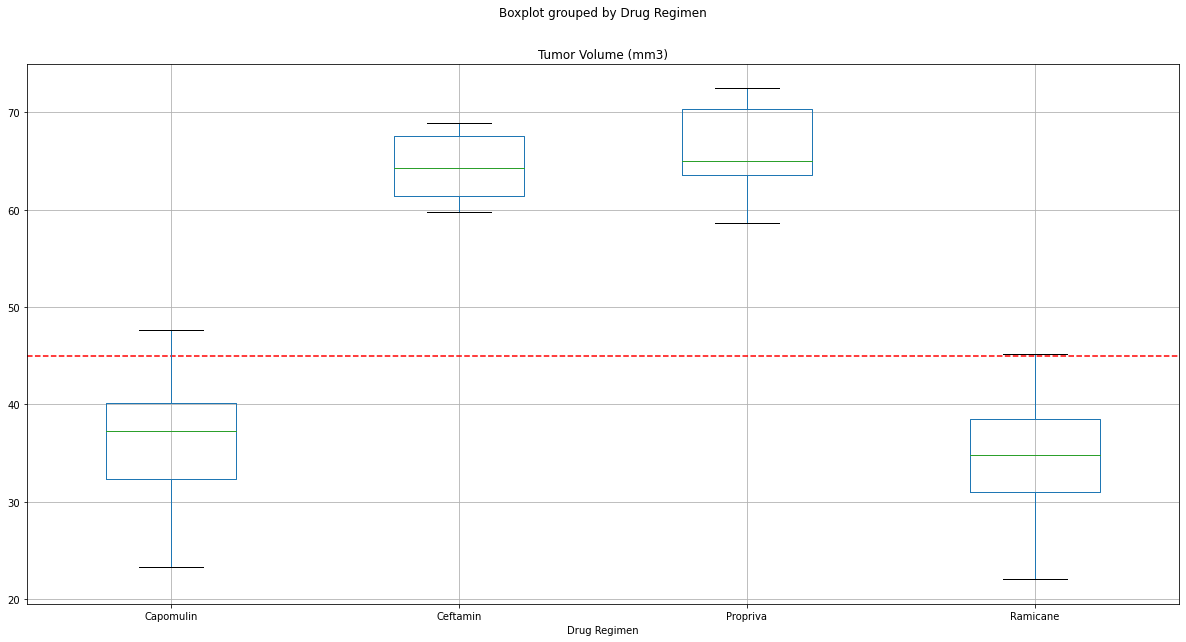

In [77]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fourbest_df.boxplot("Tumor Volume (mm3)", by="Drug Regimen", figsize=(20, 10))
left, right = plt.xlim()
plt.hlines(45, xmin=left, xmax=right, color='r', linestyles='--')

## Line and scatter plots

Text(0, 0.5, 'Tumor Size (mm3)')

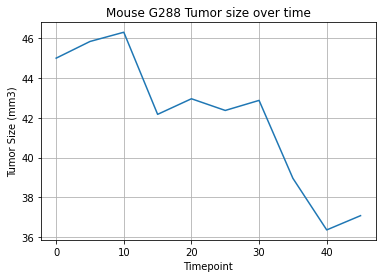

In [35]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_g288 = study_combined.loc[study_combined["Mouse ID"]=="g288"]
mouse_g288_x = mouse_g288["Timepoint"]
mouse_g288_y = mouse_g288["Tumor Volume (mm3)"]
plt.plot(mouse_g288_x, mouse_g288_y)
plt.grid()
plt.title("Mouse G288 Tumor size over time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Size (mm3)")

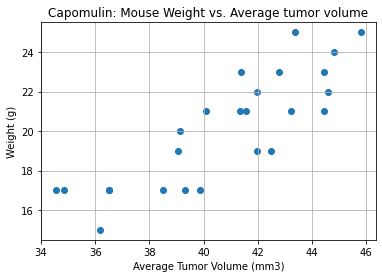

In [86]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_scatter = study_combined.loc[study_combined["Drug Regimen"]=="Capomulin"]
scatter_x = Capomulin_scatter.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
scatter_y = Capomulin_scatter.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(scatter_x, scatter_y)
plt.title("Capomulin: Mouse Weight vs. Average tumor volume")
plt.ylabel("Weight (g)")
plt.xlabel("Average Tumor Volume (mm3)")
plt.grid()

Tumor Weight = 0.7426941826944178 * Average Tumor Volume (mm3) + -10.148863164111322
Pearson Correlation Coefficient: (0.8419363424694717, 1.322572243471279e-07)


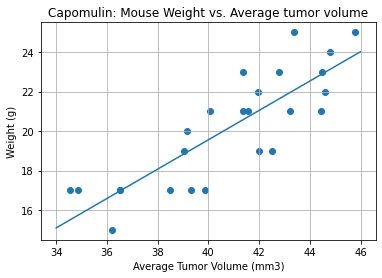

In [85]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, r_value, p_value, std_err) = st.linregress(scatter_x,scatter_y)
correlation_coefficient = st.pearsonr(scatter_x, scatter_y)
x = range(34, 47, 1)
y = slope * x + intercept
print(f"Tumor Weight = {slope} * Average Tumor Volume (mm3) + {intercept}")
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")

plt.scatter(scatter_x, scatter_y)
plt.title("Capomulin: Mouse Weight vs. Average tumor volume")
plt.ylabel("Weight (g)")
plt.xlabel("Average Tumor Volume (mm3)")


plt.plot(x,y)

plt.grid()